In [1]:
import random
import numpy as np

import torch
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets
from torchvision.transforms import v2 as transforms_v2
from torchvision.io import decode_image

import hydra
from omegaconf import DictConfig, OmegaConf
from hydra import initialize, compose

import dr_gen.utils.data as du
import dr_gen.utils.run as ru
import dr_gen.utils.viz as vu

%load_ext autoreload
%autoreload 2

### Setup Config & Helpers

In [2]:
root_path = "/Users/daniellerothermel/drotherm"
repo_path = f"{root_path}/repos/dr_gen/"

In [3]:
with initialize(config_path=f"../scripts/conf/", version_base=None):
    cfg = compose(
        config_name="config.yaml",
        overrides=[
            f"paths.root={root_path}",
            f"data.num_workers=4",
        ],
    )

In [4]:
print(OmegaConf.to_yaml(OmegaConf.to_container(cfg, resolve=True)))

paths:
  root: /Users/daniellerothermel/drotherm
  data: /Users/daniellerothermel/drotherm/data/dr_gen
  logs: /Users/daniellerothermel/drotherm/logs/dr_gen
  dataset_cache_root: /Users/daniellerothermel/drotherm/data/dr_gen/cifar10/
data:
  name: cifar10
  num_workers: 4
  cache_dataset: true
  download: true
  train:
    source: train
    source_percent: 0.8
    shuffle: true
    transform:
      normalize: true
      random_crop: true
      random_horizontal_flip: true
      color_jitter: true
      normalize_mean:
      - 0.4914
      - 0.4822
      - 0.4465
      normalize_std:
      - 0.2023
      - 0.1994
      - 0.201
      crop_size: 32
      crop_padding: 4
      random_horizontal_flip_prob: 0.5
      jitter_brightness: 0.247
  val:
    source: train
    source_percent: 0.2
    shuffle: false
    transform:
      normalize: true
      random_crop: false
      random_horizontal_flip: false
      color_jitter: false
      normalize_mean:
      - 0.4914
      - 0.4822
      - 0.

In [5]:
generator = ru.set_deterministic(cfg.seed)

### Test Out Dataloading

#### PIL images

In [ ]:
# Test loading dataset with PIL images
cifar10_train_pil = du.get_dataset(
    cfg.data, cfg.paths, train=True, as_pil=True,
)
cifar10_train_pil

In [ ]:
sample_pil = cifar10_train_pil[0]
sample_pil

In [ ]:
print(f"{type(sample_pil[0]) = }")

In [ ]:
plt.imshow(sample_pil[0])
plt.axis("off")
plt.show()

#### TV Tensor Images

In [ ]:
# Test loading dataset with tensors
cifar10_train_tvt = du.get_dataset(
    cfg.data, cfg.paths, train=True, as_pil=False,
)
cifar10_train_tvt

In [ ]:
sample_tvt = cifar10_train_tvt[0]
sample_tvt

In [ ]:
vu.plot([sample_tvt[0]])

### Test out Dataloader

In [6]:
split_dls = du.get_dataloaders(cfg, generator)

Label: 9, Batch Shape: torch.Size([5, 3, 32, 32]), Total DS Len: 50000


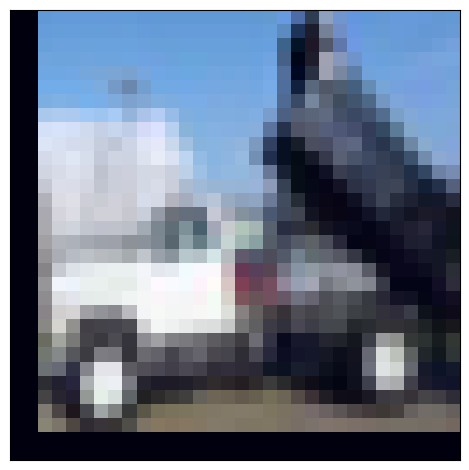

In [7]:
vu.plot_first_from_dl(split_dls['train'])

Label: 1, Batch Shape: torch.Size([10, 3, 32, 32]), Total DS Len: 10000


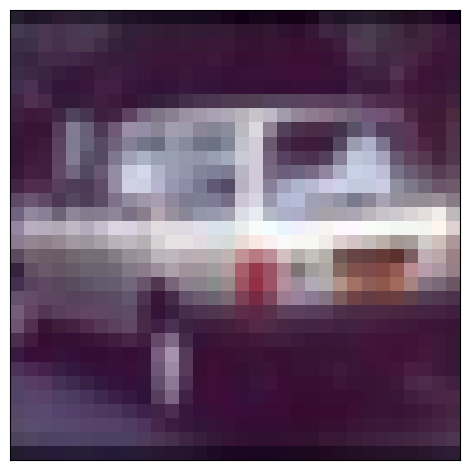

In [8]:
vu.plot_first_from_dl(split_dls['val'])

Label: 1, Batch Shape: torch.Size([10, 3, 32, 32]), Total DS Len: 10000


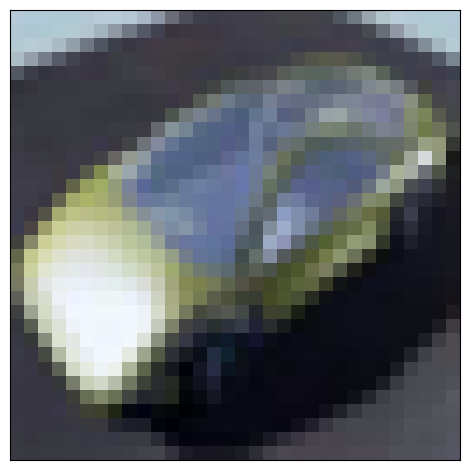

In [9]:
vu.plot_first_from_dl(split_dls['eval'])